In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

In [5]:
#import camelot as cm
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import chardet

import matplotlib.pyplot as plt  #library 1 
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns #library 2

#Estadisticos de Test

import statistics
from scipy.stats import shapiro
import scipy.stats as stats

#from termcolor import colored

# gender desertion diparities 
# realtive Distribution
# mean grades by gender

- Python encoding by default is ASCII
- 

In [70]:
base = open(r'../../data/Educacion/sexo_dni.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']

sex_dni = pd.read_csv( r'../../data/Educacion/sexo_dni.csv', encoding = charenc)
sex_dni 

,dni,sexo
0,940893,1
1,961093,1
2,4647843,0
3,5314738,0
4,6067235,1
...,...,...
1548,80095919,1
1549,80287733,0
1550,80347844,0
1551,80652103,0


In [71]:
base_educacion = pd.read_csv( r'../../data/Educacion/base_completa_panel.csv')
base_educacion

#Period 1 : 2019-2
#Perior 2 : 2020-1

,Unnamed: 0,dni,period,FC1,FC10,FC100,FC101,FC102,FC103,FC104,...,rate_approv,w_fc,w_gc,t_cre_fc,t_cre_gc,ave_gc,ave_fc,ave_total,id,signup
0,0,940893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0,940893,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,236.0,87.0,16.0,6.0,14.500000,14.750000,14.681818,1.0,1
2,1,961093,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,311.0,73.5,23.0,4.5,16.333333,13.521739,13.981818,2.0,1
3,2,961093,2.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,1.000000,260.0,64.5,18.0,4.5,14.333333,14.444444,14.422222,2.0,1
4,3,7469182,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.833333,206.0,58.5,16.0,4.5,13.000000,12.875000,12.902439,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,2287,9286729,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,245.0,90.0,17.0,5.5,16.363636,14.411765,14.888889,1.0,1
3108,2288,9694083,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3109,2288,9694083,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,267.0,91.5,17.0,5.5,16.636364,15.705882,15.933333,1.0,1
3110,2289,9713377,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [72]:
## Base de sexo y base_educación junta

base_educacion = pd.merge(base_educacion, sex_dni, how="left", on="dni")
base_educacion

,Unnamed: 0,dni,period,FC1,FC10,FC100,FC101,FC102,FC103,FC104,...,w_fc,w_gc,t_cre_fc,t_cre_gc,ave_gc,ave_fc,ave_total,id,signup,sexo
0,0,940893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,0,940893,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,236.0,87.0,16.0,6.0,14.500000,14.750000,14.681818,1.0,1,1
2,1,961093,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,311.0,73.5,23.0,4.5,16.333333,13.521739,13.981818,2.0,1,1
3,2,961093,2.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,260.0,64.5,18.0,4.5,14.333333,14.444444,14.422222,2.0,1,1
4,3,7469182,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,206.0,58.5,16.0,4.5,13.000000,12.875000,12.902439,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,2287,9286729,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,245.0,90.0,17.0,5.5,16.363636,14.411765,14.888889,1.0,1,0
3108,2288,9694083,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3109,2288,9694083,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,267.0,91.5,17.0,5.5,16.636364,15.705882,15.933333,1.0,1,0
3110,2289,9713377,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [73]:
# Cantidad de cursos desaprobados y desertados por alumnno en cada periodo

base = base_educacion[~base_educacion['id'].isna()] # alumnos matriculados

base = base.iloc[: :,1:269] # seleccionando columnas 

base['Cursos desaprobados'] = ((base > 0) & (base < 12.5)).sum(axis=1)
base['Desercion de cursos'] = (base.iloc[: :,3:266] == 0).sum(axis=1)


base = base[['dni','period','Cursos desaprobados','Desercion de cursos']]
base

,dni,period,Cursos desaprobados,Desercion de cursos
1,940893,2.0,1,0
2,961093,1.0,1,0
3,961093,2.0,1,0
4,7469182,1.0,2,0
6,7877304,1.0,3,3
...,...,...,...,...
3102,80652103,1.0,1,0
3105,90035159,2.0,1,0
3107,9286729,2.0,1,0
3109,9694083,2.0,1,0


In [74]:
# Merge educacion_base + base de n° de cursos desaprobados y deserción de cursos

base_educacion = pd.merge(base_educacion,base, how = 'left', on = ['dni','period'])
base_educacion

,Unnamed: 0,dni,period,FC1,FC10,FC100,FC101,FC102,FC103,FC104,...,t_cre_fc,t_cre_gc,ave_gc,ave_fc,ave_total,id,signup,sexo,Cursos desaprobados,Desercion de cursos
0,0,940893,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN
1,0,940893,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,6.0,14.500000,14.750000,14.681818,1.0,1,1,1.0,0.0
2,1,961093,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,4.5,16.333333,13.521739,13.981818,2.0,1,1,1.0,0.0
3,2,961093,2.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,18.0,4.5,14.333333,14.444444,14.422222,2.0,1,1,1.0,0.0
4,3,7469182,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,4.5,13.000000,12.875000,12.902439,1.0,1,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,2287,9286729,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,5.5,16.363636,14.411765,14.888889,1.0,1,0,1.0,0.0
3108,2288,9694083,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0
3109,2288,9694083,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,5.5,16.636364,15.705882,15.933333,1.0,1,0,1.0,0.0
3110,2289,9713377,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN


In [75]:
# renombrando las varaibles 

base_educacion = base_educacion.rename({'period':'Periodo', 'section':'Nivel', 'carrera':'Carrera','shift':'Turno'
                                       , 'ave_total':'Nota promedio general', 'ave_gc':'Nota promedio de cursos generales',
                                        'ave_fc':'Nota promedio de cursos de carrera','rate_approv':'ratio de aprobación por alumno'}
                                      , axis=1)

In [76]:
# Base de datos está restringida para alumnos los niveles II, IV en el semestre 2019 -2, y III,V en 2020-1

base_educacion = base_educacion[(base_educacion.Nivel > 1) & (base_educacion.Nivel < 6)]
base_educacion = base_educacion.drop(base_educacion[(base_educacion.Periodo == 1) & (base_educacion.Nivel == 5)].index)

In [77]:
# Se verifica las secciones 2 y 4 en 2019-2, y secciones 3 y 5 en 2020-1

#base_educacion[(base_educacion.Periodo == 1) & (base_educacion.Nivel == 5)]

### Tabla 1 - total de alumnos matriculados por periodo y nivel

In [78]:
# Número de alumnos por nivel y semestre

base = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Nivel'] ).size().reset_index(name='Alumnos matriculados')
base

,Periodo,Nivel,Alumnos matriculados
0,1.0,2.0,380
1,1.0,4.0,392
2,2.0,3.0,366
3,2.0,5.0,385


### Alrededor de 400 alumnos por cada nivel tanto en el periodo 2019 - 2 y 2020-1

### Figura 1 - total de alumnos matriculados por periodo y nivel

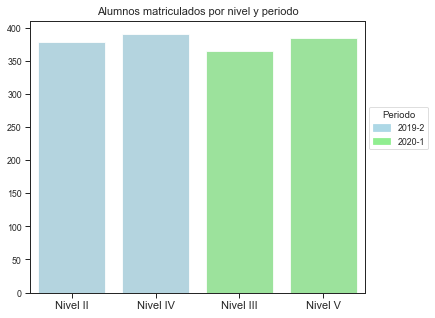

In [100]:
figure = plt.figure(1, figsize=(6,5)) # definir tamaño del gráfico y el nombre del gráfico

ax = sns.barplot( y = 'Alumnos matriculados', x = 'Nivel', order=[2.0,4.0,3.0,5.0], data = base, palette=['lightblue', 'lightblue', 'lightgreen', 'lightgreen'])


plt.xlabel('')
plt.ylabel('')
plt.title('Alumnos matriculados por nivel y periodo', size=11)


periodo1_patch = mpatches.Patch(color='lightblue', label='2019-2')
periodo2_patch = mpatches.Patch(color='lightgreen', label='2020-1')

plt.legend(title = "Periodo", handles=[periodo1_patch, periodo2_patch],  bbox_to_anchor=(1, 0.7))

# bbox_to_anchor=(1, 0.7) posiciónd e legend

(ax.set_xticklabels(["Nivel II", "Nivel IV", "Nivel III", "Nivel V"], size=11)) # label en el eje horizontal


figure.savefig(r'Figura1.png', dpi=800, bbox_inches='tight')  # save plot pbi : calidad del gráfico 

# bbox_inches='tight' ajustar el gráfico en el cuadro

### Tabla2 - composición de los alumnos matriculados por genero

In [56]:
base1 = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Nivel','sexo'] ).size().reset_index(name='Alumnos matriculados por sexo')
base2 = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Nivel'] ).size().reset_index(name='Alumnos matriculados')
base = pd.merge(base1, base2, how ='left', on =['Periodo','Nivel'])
base['Porcentaje de matriculados según sexo'] = base['Alumnos matriculados por sexo']/base['Alumnos matriculados']
base

,Periodo,Nivel,sexo,Alumnos matriculados por sexo,Alumnos matriculados,Porcentaje de matriculados según sexo
0,1.0,2.0,0,234,380,0.615789
1,1.0,2.0,1,146,380,0.384211
2,1.0,4.0,0,210,392,0.535714
3,1.0,4.0,1,182,392,0.464286
4,2.0,3.0,0,226,366,0.617486
5,2.0,3.0,1,140,366,0.382514
6,2.0,5.0,0,204,385,0.529870
7,2.0,5.0,1,181,385,0.470130


### Figura 2 - Gráfico de barra y composición de la matrícula según genero

Text(3, 185, '47.0%')

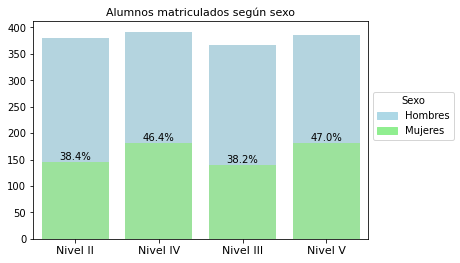

In [57]:
data2 = base[base.sexo == 1]
bar1= sns.barplot( y = 'Alumnos matriculados', x = 'Nivel', 
                   order=[2.0,4.0,3.0,5.0],
                  data = base , palette=['lightblue', 'lightblue', 'lightblue', 'lightblue'])
bar2 = sns.barplot( y = 'Alumnos matriculados por sexo', 
                    order=[2.0,4.0,3.0,5.0],
                   x = 'Nivel', data = data2 , palette=['lightgreen', 'lightgreen', 'lightgreen', 'lightgreen'])

plt.xlabel('')
plt.ylabel('')
plt.title('Alumnos matriculados según sexo', size=11)

red_patch = mpatches.Patch(color='lightblue', label='Hombres')
blue_patch = mpatches.Patch(color='lightgreen', label='Mujeres')

plt.legend(title = "Sexo", handles=[red_patch, blue_patch],  bbox_to_anchor=(1, 0.7))
(bar1.set_xticklabels(["Nivel II", "Nivel IV", "Nivel III", "Nivel V"], size=11))

bar2.text(0,150,'38.4%',color = 'black', size = 10, ha='center')
bar2.text(1,185,'46.4%',color = 'black', size = 10, ha='center')
bar2.text(2,145,'38.2%',color = 'black', size = 10, ha='center')
bar2.text(3,185,'47.0%',color = 'black', size = 10, ha='center')

### Tabla 3 - matriculados por carrera

In [15]:
# Número de alumnos amtriculados por carrera y semestre

base = base_educacion[base_educacion.signup == 1].groupby( [ 'Periodo','Carrera'] ).size().reset_index(name='Alumnos matriculados')
base.sort_values('Carrera')

,Periodo,Carrera,Alumnos matriculados
0,1.0,Administracion de empresas,144
7,2.0,Administracion de empresas,139
1,1.0,Computacion e informatica,131
8,2.0,Computacion e informatica,127
2,1.0,Contabilidad,162
9,2.0,Contabilidad,166
3,1.0,Electrotecnia industrial,110
10,2.0,Electrotecnia industrial,102
4,1.0,Mecanica automotriz,103
11,2.0,Mecanica automotriz,101


### Figura 5 - nota promedio general e histograma de frecuencias-

Text(0.5, 0, '')

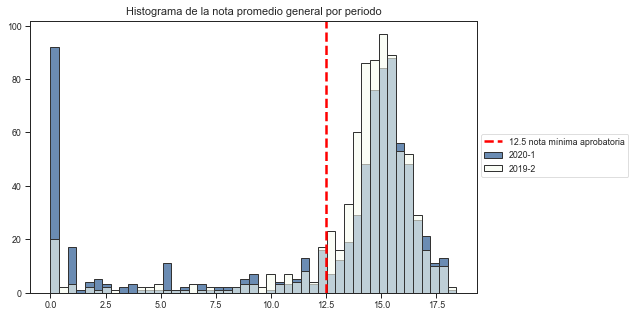

In [102]:
# Histograma de frecuencia absolutas 

fig, ax = plt.subplots(figsize=(8,5))

fig = sns.histplot(data =base_educacion,
            x = 'Nota promedio general',
            alpha = 0.6,
            hue = 'Periodo',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1
            )

plt.axvline(x=12.5,
            color='red', lw=2.5, ls='--')

plt.legend(labels=['12.5 nota mínima aprobatoria','2020-1','2019-2'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.6))
plt.title('Histograma de la nota promedio general por periodo', size=11)
plt.ylabel('')
plt.xlabel('')


# 1. Nuevo gráfico (frecuencia relativa)

Text(0.5, 0, '')

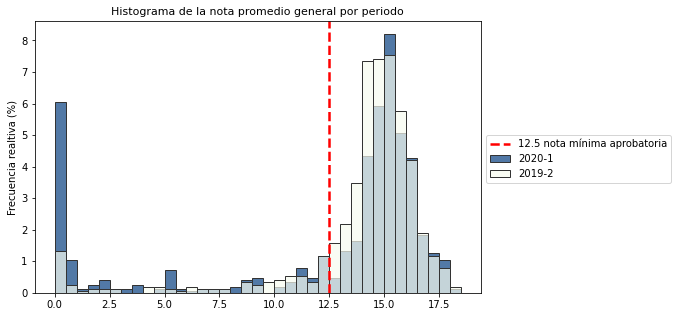

In [59]:
# Histograma de frecuencia relativa

fig, ax = plt.subplots(figsize=(8,5))

fig = sns.histplot(data =base_educacion,
            x = 'Nota promedio general',
            alpha = 0.7,
            hue = 'Periodo',
            palette='GnBu',
            edgecolor="0.2",
            linewidth=1,
            stat = "percent",  # relative 
                   binwidth=0.5
            )
plt.axvline(x=12.5,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['12.5 nota mínima aprobatoria','2020-1','2019-2'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.6))
plt.title('Histograma de la nota promedio general por periodo', size=11)
plt.ylabel('Frecuencia realtiva (%)')
plt.xlabel('')


# Cambio 1: mismo rango del eje vertical

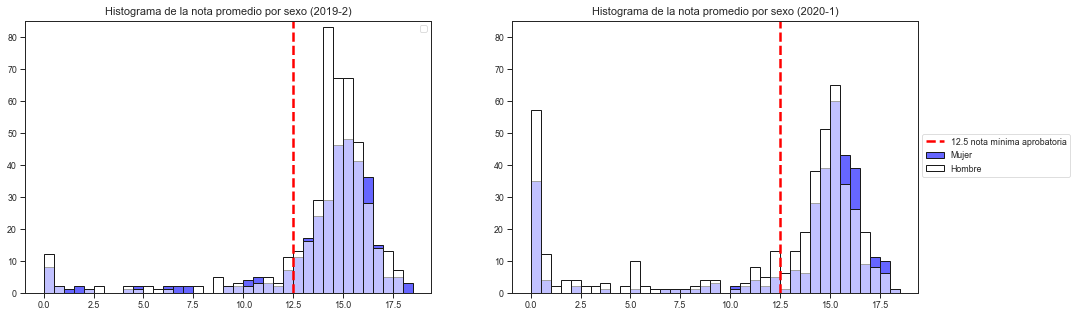

In [104]:
# Histograma de frecuencia absoluta
base = base_educacion[~base_educacion['id'].isna()]
base1 = base[base.Periodo == 1]
base2 = base[base.Periodo == 2]

fig = plt.subplots(figsize=(16,5))

plt.subplot(121) # 


sns.histplot(data = base1,
            x = 'Nota promedio general',
            alpha = 0.6,
            hue = 'sexo',
            palette=['white','blue'],
            edgecolor="0.1",
            linewidth=1,
             binwidth=0.5
            )
plt.axvline(x=12.5,
            color='red', lw=2.5, ls='--')
plt.legend('')
plt.title('Histograma de la nota promedio por sexo (2019-2)', size=11)
plt.ylabel('')
plt.xlabel('')
plt.ylim(0, 85)



plt.subplot(122)

sns.histplot(data = base2,
            x = 'Nota promedio general',
            alpha = 0.6,
            hue = 'sexo',
            palette=['white','blue'],
            edgecolor="0.1",
            linewidth=1,
             binwidth=0.5
            )
plt.axvline(x=12.5,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['12.5 nota mínima aprobatoria','Mujer','Hombre'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.6))
plt.title('Histograma de la nota promedio por sexo (2020-1)', size=11)
plt.ylabel('')
plt.xlabel('')
plt.ylim(0, 85)

plt.show()

# Cambio 2: frecuencia relativa

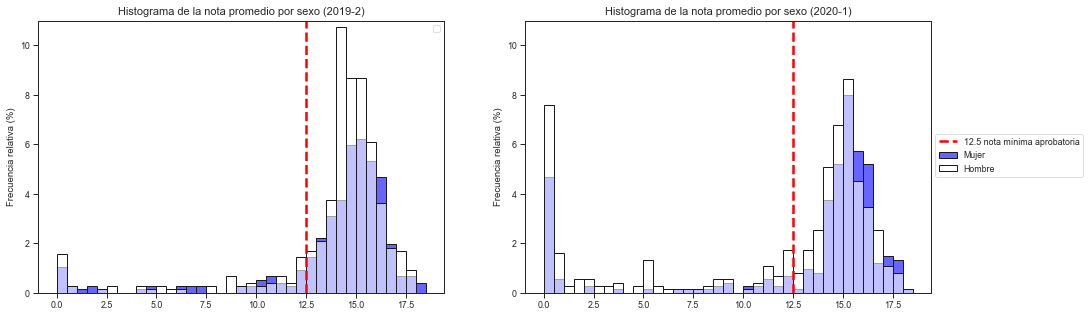

In [105]:
# Histograma de frecuencia realtiva
base = base_educacion[~base_educacion['id'].isna()]
base1 = base_educacion[base_educacion.Periodo == 1]
base2 = base_educacion[base_educacion.Periodo == 2]

fig = plt.subplots(figsize=(16,5))

plt.subplot(121)
sns.histplot(data = base1,
            x = 'Nota promedio general',
            alpha = 0.6,
            hue = 'sexo',
            palette=['white','blue'],
            edgecolor="0.1",
            linewidth=1,
            stat = "percent",
             binwidth=0.5
            )
plt.axvline(x=12.5,
            color='red', lw=2.5, ls='--')
plt.legend('')
plt.title('Histograma de la nota promedio por sexo (2019-2)', size=11)
plt.ylabel('Frecuencia relativa (%)')
plt.xlabel('')
plt.ylim(0,11)

plt.subplot(122)
sns.histplot(data = base2,
            x = 'Nota promedio general',
            alpha = 0.6,
            hue = 'sexo',
            palette=['white','blue'],
            edgecolor="0.1",
            linewidth=1,
            stat = "percent",
             binwidth=0.5
            )
plt.axvline(x=12.5,
            color='red', lw=2.5, ls='--')
plt.legend(labels=['12.5 nota mínima aprobatoria','Mujer','Hombre'],  title = "", frameon=True, bbox_to_anchor=(1.0, 0.6))
plt.title('Histograma de la nota promedio por sexo (2020-1)', size=11)
plt.ylabel('Frecuencia relativa (%)')
plt.xlabel('')
plt.ylim(0,11)

plt.show()

### Figura 6 - Histograma de frecuencia aboluta de la nota promedio general por carrera

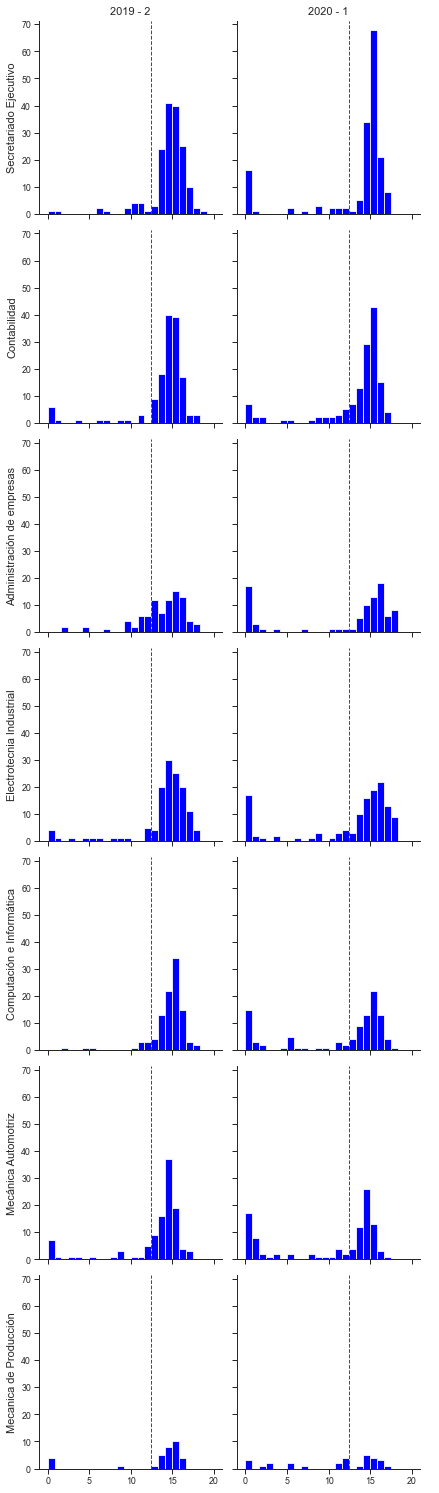

In [108]:
sns.set('paper')
sns.set_style("ticks")

grid = sns.FacetGrid(base_educacion, row="Carrera", col="Periodo", margin_titles=True)
grid.map(plt.hist, "Nota promedio general", bins=np.linspace(0, 20, 25), color = 'blue')

for ax in grid.axes.flat:
    ax.axvline(x=12.5,color='red', lw=1, ls='--')

grid.set_titles(row_template = ' ')
axes = grid.axes.flatten()
axes[0].set_title("2019 - 2", size=11)
axes[1].set_title("2020 - 1", size=11)

careers = ['Secretariado Ejecutivo','Contabilidad','Administración de empresas', 'Electrotecnia Industrial', 
           'Computación e Informática', 'Mecánica Automotriz', 'Mecanica de Producción']
 
i = 0
j = 0

for i in range(0,14,2):
    axes[i].set_ylabel(careers[j], size=11)
    i = i+2
    j = j+1
    
for ax in axes:
    ax.set_xlabel("")